<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/DTMC_Long_Run_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discrete Time Markov Chains: Long Run Behavior

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-mc-longrun.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

###1.

In [40]:
#Approach 1 for finding stationary distribution
import numpy as np

def compute_stationary_distribution(P):
    s = P.shape[0]
    identity_matrix = np.eye(s)
    ones_matrix = np.ones((s, s))

    # Compute the stationary distribution
    stationary_distribution = np.dot(np.ones(s), np.linalg.solve(identity_matrix - P + ones_matrix, np.eye(s)))

    return stationary_distribution

P = np.array([
    [0, 0, 0, 1],
    [0, 0, 0.8, 0.2],
    [0, 0.8, 0.2, 0],
    [0.8, 0.2, 0, 0]
])

stationary_distribution = compute_stationary_distribution(P)

print("Stationary Distribution:")
print(stationary_distribution)


Stationary Distribution:
[0.21052632 0.26315789 0.26315789 0.26315789]


In [18]:
pip install symbulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 964.9 kB/s eta 0:00:00


In [19]:
from symbulate import *
%matplotlib inline

In [45]:
#Approach 2 for finding stationary distribution
states = ["0", "1", "2", "3"]

TransitionMatrix = [[0, 0, 0, 1],
                    [0, 0, 0.8, 0.2],
                    [0, 0.8, 0.2, 0],
                    [0.8, 0.2, 0, 0]]

InitialDistribution = [1/4, 1/4, 1/4, 1/4]
#InitialDistribution = [0, 0, 1, 0]


X = MarkovChain(TransitionMatrix, InitialDistribution, states)



In [46]:
X[10].sim(10000).tabulate(normalize = True)

0,0.2235
1,0.2701
2,0.2525
3,0.2539
Total,1.0


The stationary distributions between the two methods appear to agree.

$$
\pi = \begin{bmatrix}
0.211 & 0.263 & 0.263 & 0.263
\end{bmatrix}
$$

We want to answer the question "In the long run, on what proportion of trips does Rihanna get wet?"

That is equivalent to what is the proportion of times that she was somewhere without an umbrella and it was raining. This can be written and solved as the following:

$$\pi[0] \cdot P(rain) = 0.211 \cdot 0.2 = 0.0422$$


In [47]:
0.211*0.2

0.0422

###2.

a.

In [50]:
P = np.array([
    [0, 0.5, 0.5],
    [0.1, 0.4, 0.5],
    [0.2, 0.3, 0.5],
])

stationary_distribution = compute_stationary_distribution(P)

print(stationary_distribution)

[0.13636364 0.36363636 0.5       ]


In [55]:
days = 365*stationary_distribution
print(days)

[ 49.77272727 132.72727273 182.5       ]


Above is the porportion of days in a year where we have either a sandwitch, a burrito or a pizza.

In [64]:
cost = np.array([9, 7, 5])
total = np.dot(days,cost)
#total = days[0]*9 + days[1]*7 + days[2]*5

daily_cost = total/365
print(daily_cost)

daily_cost = np.dot(stationary_distribution, cost)
print(daily_cost)

6.2727272727272725
6.272727272727273


Above shows the expected daily totaly cost for the year.

b.

Before we were asked questions about the probability of certain events happening as we analyzed the behavior of a single step in time over many paths. Here we are looking at one path over many steps in time which results in similar behavior but from a different perspective.

###3.

a.

$$
\mathbf{P} =
\begin{bmatrix}
& 0 & 1 & 2 & 3 & 4\\
0 & 0 & 0 & 0 & 0 & 1\\
1 & 0 & 0.2 & 0 & 0.8 & 0\\
2 & 0.1 & 0.2 & 0.3 & 0.4 & 0\\
3 & 0 & 0.6 & 0 & 0.4 & 0\\
4 & 0.3 & 0 & 0 & 0 & 0.7
\end{bmatrix}
$$

In [13]:
import graphviz
import numpy as np

def make_mc_graph(npmatrix=np,filename="markov_chain_diagram"):
  # Create a graph
  markov_chain_graph = graphviz.Digraph('MarkovChain', format='png', engine='dot')

  # Add states to the graph
  for i in range(len(transition_matrix)):
      markov_chain_graph.node(str(i), label=f'{i}')

  # Add transitions with probabilities
  for i in range(len(transition_matrix)):
      for j in range(len(transition_matrix[i])):
          probability = transition_matrix[i, j]
          if probability > 0:
              markov_chain_graph.edge(str(i), str(j), label=f'{probability:.2f}')

  # Save the graph to a file and render it
  markov_chain_graph.render(filename, cleanup=True, format='png')

  print("Markov chain diagram generated and saved as", filename)

# Define the transition matrix
transition_matrix = np.array([
    [0, 0, 0, 0, 1],
    [0, 0.2, 0, 0.8, 0],
    [0.1, 0.2, 0.3, 0.4, 0],
    [0, 0.6, 0, 0.4, 0],
    [0.3, 0, 0, 0, 0.7]
])

make_mc_graph(transition_matrix)

Markov chain diagram generated and saved as markov_chain_diagram


In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
img = plt.imread('markov_chain_diagram.png')

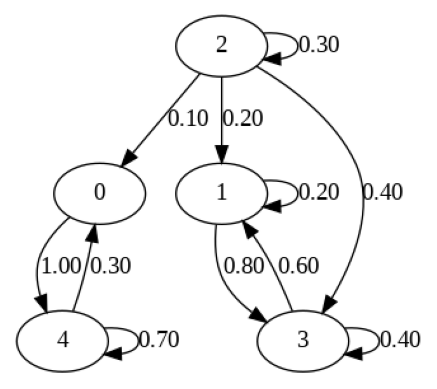

In [4]:
plt.axis("off")
plt.imshow(img)

Transient state(s): 2

Recurrent state(s): 0, 4, 1, 3

Irreducible closed sets: {0,4}, {1,3}

b.

$$
\mathbf{P} =
\begin{bmatrix}
& 0 & 1 & 2 & 3 & 4 & 5\\
0 & 2/3 & 0 & 0 & 1/3 & 0 & 0\\
1 & 0 & 1/2 & 0 & 0 & 1/2 & 0\\
2 & 0 & 0 & 1/3 & 1/3 & 1/3 & 0\\
3 & 1/2 & 0 & 0 & 1/2 & 0 & 0\\
4 & 0 & 1/2 & 0 & 0 & 1/2 & 0\\
5 & 1/2 & 0 & 0 & 1/2 & 0 & 0
\end{bmatrix}
$$

In [5]:
# Define the transition matrix
transition_matrix = np.array([
    [2/3, 0, 0, 1/3, 0, 0],
    [0, 1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 1/3, 1/3, 0],
    [1/2, 0, 0, 1/2, 0, 0],
    [0, 1/2, 0, 0, 1/2, 0],
    [1/2, 0, 0, 1/2, 0, 0]
])

make_mc_graph(transition_matrix)

Markov chain diagram generated and saved as markov_chain_diagram.png


In [6]:
img = plt.imread('markov_chain_diagram.png')

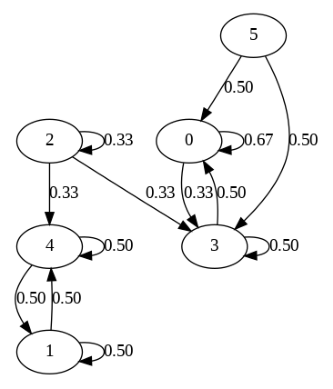

In [7]:
plt.axis("off")
plt.imshow(img)

Transient state(s): 2, 5

Recurrent state(s): 4, 1, 0, 3

Irreducible closed sets: {1,4}, {0,3}

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.

I think the big learning points of this section were the idea we are looking at markov chains from a different persepective when doing analysis on their long run behavior and that even with this different pespective it still relates to the stationary distrubution.

I appreciated the question ask on discord because I was also unsure what closed sets meant in this context.